<a href="https://colab.research.google.com/github/Ausawin2016/30Daypy/blob/master/%235_Assignment_3_%E0%B8%AD%E0%B8%B1%E0%B8%A8%E0%B8%A7%E0%B8%B4%E0%B8%99_%E0%B9%80%E0%B8%AD%E0%B8%B5%E0%B9%88%E0%B8%A2%E0%B8%A1%E0%B8%AA%E0%B8%B0%E0%B8%AD%E0%B8%B2%E0%B8%94_IMDb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDb

https://bit.ly/2TXtBhc

เว็บ IMDb รวบรวมข้อมูลเกี่ยวกับภาพยนตร์ต่างๆ และตัดข้อมูลบางส่วนมาให้ใช้ทำการทดลองต่างๆ ได้ https://www.imdb.com/interfaces/

โจทย์นี้คัดกรอง [ข้อมูลบางส่วนใน IMDb](https://drive.google.com/file/d/1V5VNg1WTMTS_eEOQqylektM9ZwdG1uq2/view?usp=sharing) มา โดยโดยมีไฟล์นี้อยู่

**filteredCast.tsv**
- tconst (string) - alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- nconst (string) - alphanumeric unique identifier of the name/person
- category (string) - the category of job that person was in
- job (string) - the specific job title if applicable, else '\N'
- characters (string) - the name of the character played if applicable, else '\N'

**filteredTitle.tsv**
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title

**filteredStar.tsv**
- nconst (string) - alphanumeric unique identifier of the name/person
- primaryName (string)– name by which the person is most often credited
- birthYear – in YYYY format
- deathYear – in YYYY format if applicable, else '\N'
- primaryProfession (array of strings)– the top-3 professions of the person
- knownForTitles (array of tconsts) – titles the person is known for

# โจทย์

1. มีภาพยนตร์กี่ประเภท (genres) แต่ละประเภทมีอย่างละกี่เรื่อง พร้อมพล็อตกราฟ
2. มีนักแสดงชายและหญิงอย่างละกี่คน(นับจากไฟล์ filteredStar)
3. นักแสดงที่ยังมีชีวิตมีอายุเท่าไหร่บ้าง แต่ละช่วงมีกี่คน
4. มีนักแสดงกี่คนที่เคยแสดงในภาพยนตร์ Action
5. มีนักแสดงกี่คนที่แสดงในภาพยนตร์มากกว่า 1 ประเภท
6. มีภาพยนตร์ทั้งหมดกี่เรื่องที่เข้าฉายในปีอธิกสุรทิน
7. มีผู้กำกับกี่คนที่เป็นนักแสดงด้วย
8. หาจำนวนภาพยนต์แนวรอมคอมในแต่ละปี พร้อมพล็อตกราฟ(นับเฉพาะปีที่มีตั้งแต่ 1 เรื่องขึ้นไป)


# 1. มีภาพยนตร์กี่ประเภท (genres) แต่ละประเภทมีอย่างละกี่เรื่อง พร้อมพล็อตกราฟ

In [85]:
import pandas as pd

df_Cast =pd.read_csv("filteredCast-v2.tsv",sep='\t')
df_Star= pd.read_csv("filteredStar-v2.tsv",sep='\t')
df_Title = pd.read_csv("filteredTitle-v2.tsv",sep='\t')
df_Title
#df_Cast.head()
#df_Star.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0192789,movie,While Supplies Last,While Supplies Last,0,2002,\N,120,"Comedy,Musical"
1,tt4914592,movie,Electric Heart,Electric Heart,0,2017,\N,75,"Adventure,Drama,Music"
2,tt4999994,movie,Rain Doll,Rain Doll,0,2016,\N,115,Drama
3,tt2690572,movie,The Blessed Ones,Polaris,0,2017,\N,79,Drama
4,tt1562859,movie,Golmaal 3,Golmaal 3,0,2010,\N,155,"Action,Comedy"
...,...,...,...,...,...,...,...,...,...
6288,tt5640450,movie,ARQ,ARQ,0,2016,\N,88,"Action,Sci-Fi,Thriller"
6289,tt0404240,movie,Mission Mumbai,Mission Mumbai,0,2004,\N,117,Action
6290,tt1310674,movie,Vashti Bunyan: From Here to Before,Vashti Bunyan: From Here to Before,0,2008,\N,87,Documentary
6291,tt0204187,movie,Casa d'appuntamento... puttana dalla testa ai ...,Casa d'appuntamento... puttana dalla testa ai ...,1,1994,\N,85,Adult


In [78]:
sum_genres = df_Title.groupby(['genres']).sum()
sum_genres.drop(labels= ['isAdult','startYear'], axis=1)
sum_genres.sum()

isAdult            76
startYear    12647805
dtype: int64

In [86]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt

unique_genres = df_Title['genres'].unique()
individual_genres = []

for genre in unique_genres:
    individual_genres.append(genre.split(','))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

individual_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western',
 '\\N'}

Comedy 1694
Sci-Fi 181
Adventure 277
Fantasy 218
Romance 825
Mystery 268
Musical 74
Action 733
Sport 80
Family 247
Adult 56
Horror 559
Drama 3041
Documentary 484
Biography 178
News 7
Reality-TV 3
Music 197
War 83
Western 22
History 120
Animation 132
Thriller 726
Crime 488


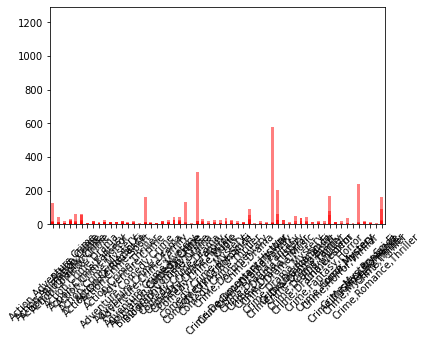

In [94]:

 
#individual_genres
 
for genre in individual_genres:
  if genre!='\\N':
    current_genre = df_Title['genres'].str.contains(genre).fillna(False)
    df_Title[current_genre].genres.value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, rot=45)
    print(genre, len(df_Title[current_genre]))

# 2. มีนักแสดงชายและหญิงอย่างละกี่คน(นับจากไฟล์ filteredStar)

In [ ]:
#solutio

import pandas as pd

#df_Cast =pd.read_csv("filteredCast-v2.tsv",sep='\t')
df_Star= pd.read_csv("filteredStar-v2.tsv",sep='\t')
#df_Title = pd.read_csv("filteredTitle-v2.tsv",sep='\t')
df_Star

In [101]:
df_Sex = pd.merge(df_Cast, df_Star, on=['nconst'])
 
sex_actor=df_Sex[df_Sex["category"]=='actor'].count()["tconst"]
sex_actress=df_Sex[df_Sex["category"]=='actress'].count()["tconst"]
 
print('Actor = ',sex_actor)
print('Actree= ',sex_actress)

Actor :  4609
Actree:  4528


# 3. นักแสดงที่ยังมีชีวิตมีอายุเท่าไหร่บ้าง แต่ละช่วงมีกี่คน

In [ ]:
#solution

# 4. มีนักแสดงกี่คนที่เคยแสดงในภาพยนตร์ Action

In [92]:
#solution
df_Title = pd.read_csv("filteredTitle-v2.tsv",sep='\t')
df_Title

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0192789,movie,While Supplies Last,While Supplies Last,0,2002,\N,120,"Comedy,Musical"
1,tt4914592,movie,Electric Heart,Electric Heart,0,2017,\N,75,"Adventure,Drama,Music"
2,tt4999994,movie,Rain Doll,Rain Doll,0,2016,\N,115,Drama
3,tt2690572,movie,The Blessed Ones,Polaris,0,2017,\N,79,Drama
4,tt1562859,movie,Golmaal 3,Golmaal 3,0,2010,\N,155,"Action,Comedy"
...,...,...,...,...,...,...,...,...,...
6288,tt5640450,movie,ARQ,ARQ,0,2016,\N,88,"Action,Sci-Fi,Thriller"
6289,tt0404240,movie,Mission Mumbai,Mission Mumbai,0,2004,\N,117,Action
6290,tt1310674,movie,Vashti Bunyan: From Here to Before,Vashti Bunyan: From Here to Before,0,2008,\N,87,Documentary
6291,tt0204187,movie,Casa d'appuntamento... puttana dalla testa ai ...,Casa d'appuntamento... puttana dalla testa ai ...,1,1994,\N,85,Adult


# 5. มีนักแสดงกี่คนที่แสดงในภาพยนตร์มากกว่า 1 ประเภท

In [ ]:
#solution

#6. มีภาพยนตร์ทั้งหมดกี่เรื่องที่เข้าฉายในปีอธิกสุรทิน


In [ ]:
#solution

#7. มีผู้กำกับกี่คนที่เป็นนักแสดงด้วย

In [ ]:
#solution

#8. หาจำนวนภาพยนต์แนวรอมคอมในแต่ละปี พร้อมพล็อตกราฟ(นับเฉพาะปีที่มีตั้งแต่ 1 เรื่องขึ้นไป)


In [ ]:
#solution